In [ ]:
from keras import models
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
pip install gdown unrar

In [ ]:
!gdown https://drive.google.com/u/0/uc?id=1-R2tYoDl_P56LevfF95tP_qv1MbcVZQJ
!gdown https://drive.google.com/uc?id=13zpbNNGYafdYWmdQO0-ArGjm9ipZkD5Q

Downloading...
From: https://drive.google.com/u/0/uc?id=1-R2tYoDl_P56LevfF95tP_qv1MbcVZQJ
To: /content/dataset_images_minitest.csv
100% 739k/739k [00:00<00:00, 86.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=13zpbNNGYafdYWmdQO0-ArGjm9ipZkD5Q
To: /content/data_folder.rar
937MB [00:06, 151MB/s]


In [ ]:
!ls

data_folder  data_folder.rar  dataset_images_minitest.csv  sample_data


In [ ]:
!unrar x data_folder.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from data_folder.rar


Would you like to replace the existing file data_folder/10002005746_7f1502879b.jpg
 26694 bytes, modified on 2018-07-30 16:40
with a new one
 26694 bytes, modified on 2018-07-30 16:40

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 
User break

User break


In [ ]:
data = pd.read_csv('dataset_images_minitest.csv', delimiter = '\t')

rdata = np.asarray(data.sample(len(data['filename'])))

In [ ]:
images = []

for i in range(len(rdata)):
    #print(i, rdata[i,0])
    images.append(np.array(Image.open('data_folder/' + rdata[i][0]).convert('L').resize((100,100))))

In [ ]:
np.shape(images)

(20987, 100, 100)

Label: ['3774825950_4f6ae0f663.jpg' 'graduation']


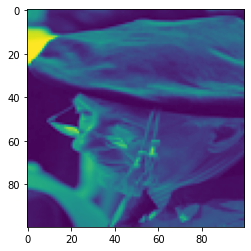

In [ ]:
k = np.int(np.random.uniform(0,len(rdata)))

plt.imshow(images[k])
print('Label:', rdata[k])

In [ ]:
for i in range(len(rdata)):
    if rdata[i,1] == 'picnic':
        rdata[i,1] = 0
    elif rdata[i,1] == 'graduation':
        rdata[i,1] = 1
    elif rdata[i,1] == 'meeting':
        rdata[i,1] = 2

In [ ]:
train_images = np.array(images[:np.int(0.8*len(images))])
test_images = np.array(images[np.int(0.8*len(images)):])

train_labels = rdata[:np.int(0.8*len(rdata)),1]
test_labels = rdata[np.int(0.8*len(rdata)):,1]

In [ ]:
train_images = (train_images / 255)
test_images = (test_images / 255)

train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
network = models.Sequential()
network.add(Conv2D(1000, (4,4), input_shape = (100, 100, 1)))
network.add(MaxPooling2D(pool_size=(3,3)))
network.add(Dropout(0.2))

network.add(Conv2D(500, (4,4)))
network.add(MaxPooling2D(pool_size=(3,3)))
network.add(Dropout(0.2))

network.add(Conv2D(200, (4,4)))
network.add(MaxPooling2D(pool_size=(3,3)))
network.add(Dropout(0.2))

network.add(Flatten())
network.add(Dense(100, activation = 'relu'))
network.add(Dense(3, activation = 'softmax'))

In [ ]:
model = network.fit(train_images, train_labels, epochs = 10, batch_size = 100)

Epoch 1/10
168/168 [==============================] - 179s 1s/step - loss: 1.2155 - accuracy: 0.4723
Epoch 2/10
168/168 [==============================] - 177s 1s/step - loss: 0.9766 - accuracy: 0.5355
Epoch 3/10
168/168 [==============================] - 177s 1s/step - loss: 0.9335 - accuracy: 0.5622
Epoch 4/10
168/168 [==============================] - 178s 1s/step - loss: 0.8946 - accuracy: 0.5908
Epoch 5/10
168/168 [==============================] - 178s 1s/step - loss: 0.8658 - accuracy: 0.6106
Epoch 6/10
168/168 [==============================] - 178s 1s/step - loss: 0.8490 - accuracy: 0.6203
Epoch 7/10
168/168 [==============================] - 178s 1s/step - loss: 0.7941 - accuracy: 0.6527
Epoch 8/10
168/168 [==============================] - 178s 1s/step - loss: 0.7854 - accuracy: 0.6560
Epoch 9/10
168/168 [==============================] - 177s 1s/step - loss: 0.7386 - accuracy: 0.6833
Epoch 10/10
168/168 [==============================] - 177s 1s/step - loss: 0.6860 - accura

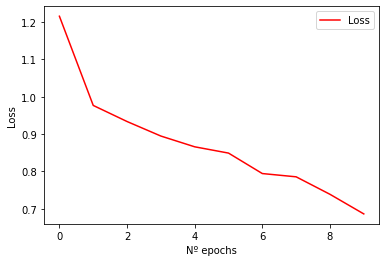

In [ ]:
plt.plot(model.history['loss'], color = 'red', label = 'Loss')
plt.xlabel('Nº epochs')
plt.ylabel('Loss')
plt.legend()

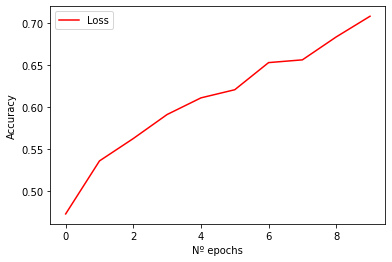

In [ ]:
plt.plot(model.history['accuracy'], color = 'red', label = 'Loss')
plt.xlabel('Nº epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
test_loss, test_acc  = network.evaluate(test_images, test_labels)
print('test_acc = ', test_acc)

132/132 [==============================] - 10s 74ms/step - loss: 0.9419 - accuracy: 0.6146
test_acc =  0.614578366279602


Epoch 1/10
168/168 [==============================] - 85s 506ms/step - loss: 1.1874 - accuracy: 0.4353 - val_loss: 0.9990 - val_accuracy: 0.5051
Epoch 2/10
168/168 [==============================] - 84s 499ms/step - loss: 0.9754 - accuracy: 0.5303 - val_loss: 0.9388 - val_accuracy: 0.5699
Epoch 3/10
168/168 [==============================] - 84s 499ms/step - loss: 0.9368 - accuracy: 0.5629 - val_loss: 0.8981 - val_accuracy: 0.5919
Epoch 4/10
168/168 [==============================] - 84s 499ms/step - loss: 0.9084 - accuracy: 0.5861 - val_loss: 0.8904 - val_accuracy: 0.5949
Epoch 5/10
168/168 [==============================] - 84s 499ms/step - loss: 0.8805 - accuracy: 0.5986 - val_loss: 0.9037 - val_accuracy: 0.5821
Epoch 6/10
168/168 [==============================] - 84s 499ms/step - loss: 0.8567 - accuracy: 0.6141 - val_loss: 0.9069 - val_accuracy: 0.5866
Epoch 7/10
168/168 [==============================] - 84s 499ms/step - loss: 0.8151 - accuracy: 0.6423 - val_loss: 0.9184 - val_ac

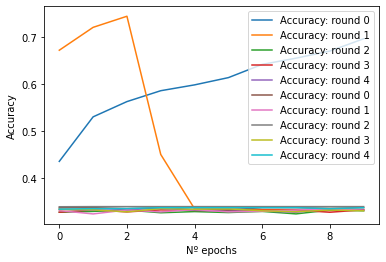

In [ ]:
acc = []
val_acc = []
loss = []
val_loss = []

for k in range(2):
  rdata = np.asarray(data.sample(len(data['filename'])))
  images = []
  for k in range(len(rdata)):
    #print(i, rdata[i,0])
    images.append(np.array(Image.open('data_folder/' + rdata[k][0]).convert('L').resize((100,100))))
  for n in range(len(rdata)):
    if rdata[n,1] == 'picnic':
        rdata[n,1] = 0
    elif rdata[n,1] == 'graduation':
        rdata[n,1] = 1
    elif rdata[n,1] == 'meeting':
        rdata[n,1] = 2
  for i in range(5):
    train_images = []
    test_images = []
    train_labels = []
    test_labels = []

    network.compile(optimizer = 'adam', 
                    loss = 'categorical_crossentropy', 
                    metrics = ['accuracy'])

    for j in range(len(images)):
      if j in range((i)*np.int(0.2*len(images)),(i+1)*np.int(0.2*len(images))):
        test_images.append(np.array(images[j]))
        test_labels.append(rdata[j,1])
      elif j > (i)*np.int(0.2*len(images)):
        train_images.append(np.array(images[j]))
        train_labels.append(rdata[j,1])
      elif j < (i+1)*np.int(0.2*len(images)):
        train_images.append(np.array(images[j]))
        train_labels.append(rdata[j,1])

    train_images = (np.asarray(train_images) / 255)
    test_images = (np.asarray(test_images) / 255)

    train_images = np.expand_dims(train_images, axis=3)
    test_images = np.expand_dims(test_images, axis=3)

    train_labels = to_categorical(train_labels)
    test_labels = to_categorical(test_labels)  

    model = network.fit(train_images, train_labels, epochs = 10, batch_size = 100,
                        validation_data=(test_images, test_labels))
    
    acc.append(model.history['accuracy'])
    val_acc.append(model.history['val_accuracy'])
    loss.append(model.history['loss'])
    val_loss.append(model.history['val_loss'])

    plt.plot(model.history['accuracy'], label = 'Accuracy: round %i' %(i))
    plt.xlabel('Nº epochs')
    plt.ylabel('Accuracy')
    plt.legend()

In [ ]:
pred = network.predict(test_images)

th = np.linspace(0, 1, 100)

In [ ]:
def ROC(th, pred, test_label):
    FPR = np.zeros(len(th))
    TPR = np.zeros(len(th))
    
    N = pred[np.where(test_label == 0)]
    P = pred[np.where(test_label == 1)]
    
    for i in range(len(th)):
        FN = len(np.where(P <= th[i])[0])
        FP = len(np.where(N > th[i])[0])
        TN = len(np.where(N <= th[i])[0])
        TP = len(np.where(P > th[i])[0])
        
        FPR[i] = FP/(FP + TN)
        TPR[i] = TP/(TP + FN)
        
        result = np.concatenate((FPR, TPR)).reshape(2, len(th))#.T (Quando for plotar, tira esse T e qnd for integrar deixa)
        
    return result[np.argsort(result[:,0])]

plt.plot(*ROC(th, pred, test_label))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

roc = ROC(th, pred, test_label).T

# Exclude repeated values to allow integration
r = roc[:1]
for i in range(1,len(roc)):

  if (roc[i,0] != roc[i-1,0]):

    r = np.append(r, roc[i])

# ROC curve without repeated values
roc = r.reshape((np.int(len(r)/2), 2))

S = -simps(roc[:,1], roc[:,0])
print('Área ROC:', S)